In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd

In [28]:
# Following Equation (8) in https://arxiv.org/abs/1705.08068 Galaxy Groups within 3500 km s−1
max_log10_L = np.log10(0.0927E10)
min_log10_L = np.log10(4.423E10)

left_log10_L = np.linspace(2.0, max_log10_L, 10)
right_log10_L = np.linspace(min_log10_L, 15, 10)

def f_log10_M_L_left(log10_L):
    log10_M_lum = -0.5*(log10_L - 10) + np.log10(32)
    return log10_M_lum

def f_log10_M_L_right(log10_L):
    log10_M_lum = 0.15*(log10_L - 10) + np.log10(32)
    return log10_M_lum

left_log10_M_L = f_log10_M_L_left(left_log10_L)
right_log10_M_L = f_log10_M_L_right(right_log10_L)

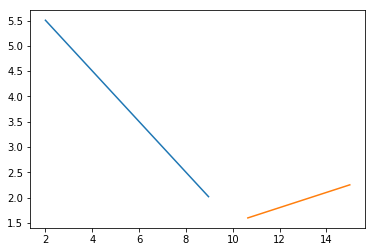

In [29]:
plt.plot(left_log10_L, left_log10_M_L)
plt.plot(right_log10_L, right_log10_M_L)

In [30]:
log10_L = np.concatenate((left_log10_L, right_log10_L))
log10_M_L = np.concatenate((left_log10_M_L, right_log10_M_L))

f_cubic = scipy.interpolate.interp1d(log10_L, log10_M_L, kind='cubic')

log10_L_test = np.linspace(2,15,10000)
log10_M_L_test = f_cubic(log10_L_test)

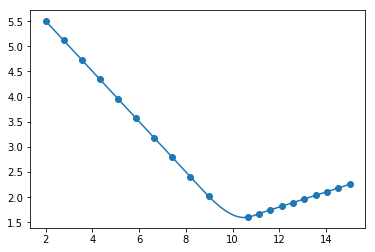

In [31]:
plt.scatter(log10_L, log10_M_L)
plt.plot(log10_L_test, log10_M_L_test)

In [32]:
df = pd.read_hdf('../data/TNG_mock_0_0_0_.h5', mode="r")
K = np.array(df['K'])[0]
log_LK = 0.4*(3.28-K)

log_ML_ratio = f_cubic(log_LK)
log_M = log_ML_ratio + log_LK # calculo del logaritmo de la masa

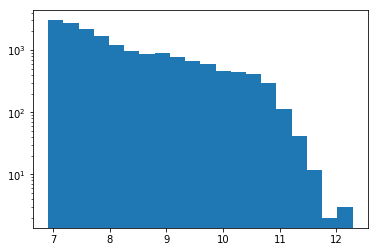

In [33]:
_ = plt.hist(log_LK, bins=20, log=True)

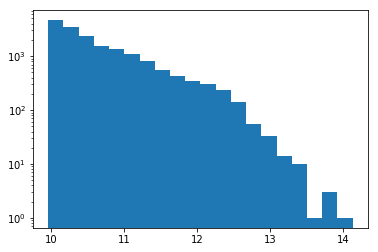

In [34]:
_ = plt.hist(log_M, bins=20, log=True)